In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings


In [51]:
# Data Collection and Analysis 
diabete_data=pd.read_csv('diabetes.csv')

In [10]:
diabete_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabete_data.shape


(768, 9)

In [12]:
# statistical measures 
diabete_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
diabete_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
# 0=non diabetic 1=diabetic 
diabete_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
#separate data and labels 
x= diabete_data.drop(columns = 'Outcome', axis=1 )
y=diabete_data['Outcome']
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [20]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [23]:
#Data standarisation 
scaler= StandardScaler()
scaler.fit(x)

StandardScaler()

In [25]:
standardized_data=scaler.transform(x)

In [26]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


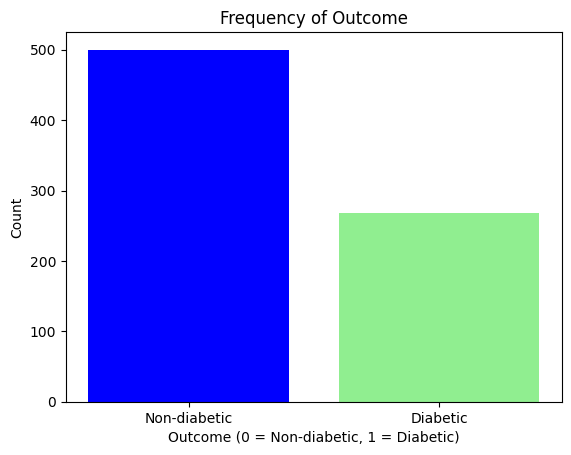

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [57]:
#Visualizations
df=pd.DataFrame(diabete_data)
# Visualize Outcome frequency
# Calculate the frequency of Outcome classes
outcome_counts = df['Outcome'].value_counts()
# Define custom colors for the bars
colors = ['blue', 'lightgreen']
# Create a bar plot for Outcome frequency
plt.bar(outcome_counts.index, outcome_counts.values ,  color=colors)
plt.xlabel('Outcome (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.title('Frequency of Outcome')
plt.xticks(outcome_counts.index, ['Non-diabetic', 'Diabetic'])
plt.show()

# Display the DataFrame
print(df)


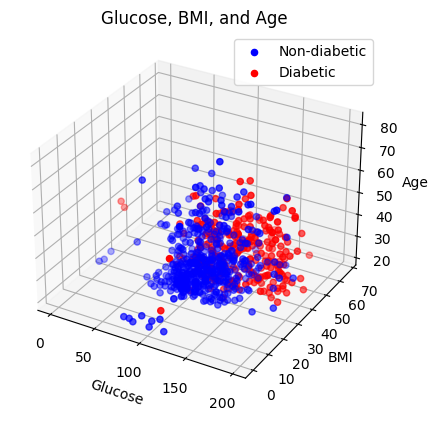

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [61]:
# 3D Scatter plot of Glucose, BMI, and Age
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate the data for each Outcome class
non_diabetic = df[df['Outcome'] == 0]
diabetic = df[df['Outcome'] == 1]

# Plot the data points
ax.scatter(non_diabetic['Glucose'], non_diabetic['BMI'], non_diabetic['Age'], color='blue', label='Non-diabetic')
ax.scatter(diabetic['Glucose'], diabetic['BMI'], diabetic['Age'], color='red', label='Diabetic')

# Set labels for each axis
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# Set a title and show the legend
plt.title('Glucose, BMI, and Age')
plt.legend()

# Show the 3D scatter plot
plt.show()
# Display the DataFrame
print(df)

In [27]:
#Train Test Split 
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2 ,stratify=y, random_state=2)

In [29]:
print(x.shape , X_train.shape , X_test.shape ) 

(768, 8) (614, 8) (154, 8)


In [30]:
#training the model 
classifier = svm.SVC(kernel='linear')
 #SVC (Support Vector Classifier)  svm (Support Vector Machines)

In [31]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [32]:
#Model Evaluation 
# accuracy score on the training data
X_train_prediction= classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction , Y_train)


In [34]:
print('Accuracy score : ', training_data_accuracy)

Accuracy score :  0.7833876221498371


In [35]:
# accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [36]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
#the model is not well trained because the accuracy is not high 

In [65]:

def make_prediction(features):
    # Reshape the features to a 2D array
    features_array = np.asarray(features)
    features_reshaped = features_array.reshape(1, -1)

    # Standardize the features
    std_features = scaler.transform(features_reshaped)

    # Make the prediction
    prediction = classifier.predict(std_features)

    # Return the prediction result
    return prediction[0]

def display_prediction(prediction):
    if prediction == 0:
        print('The person is not diabetic')
    else:
        print('The person is diabetic')

# Define the features for prediction
features = (10, 139, 80, 0, 0, 27.1, 1.441, 57)

try:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        prediction = make_prediction(features)

    # Display the prediction
    display_prediction(prediction)
except Exception as e:
    print('An error occurred during prediction:', str(e))


The person is not diabetic
